#Data Extracting

In [0]:
import tensorflow
tensorflow.__version__


'2.2.0-rc1'

In [0]:
!pip uninstall tensorflow
!pip install tensorflow==1.14

Uninstalling tensorflow-2.2.0rc1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc1
     |████████████████████████████████| 109.2MB 105kB/s 
     |████████████████████████████████| 3.2MB 30.9MB/s 
     |████████████████████████████████| 491kB 51.1MB/s 
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


In [0]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 944 (delta 37), reused 51 (delta 11), pack-reused 857
Receiving objects: 100% (944/944), 172.05 MiB | 41.22 MiB/s, done.
Resolving deltas: 100% (422/422), done.
Checking out files: 100% (234/234), done.


In [0]:
import pandas as pd
data = pd.read_csv("/content/covid-chestxray-dataset/metadata.csv")

In [0]:
data.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,leukocyte count,neutrophil count,lymphocyte count,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 21
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


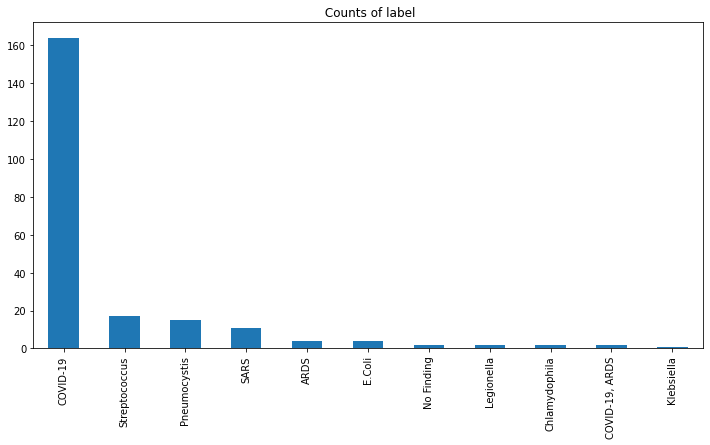

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
data['finding'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

In [0]:

print((data['finding']=='COVID-19').value_counts())
data1= data[data.finding == 'COVID-19']

True     164
False     60
Name: finding, dtype: int64


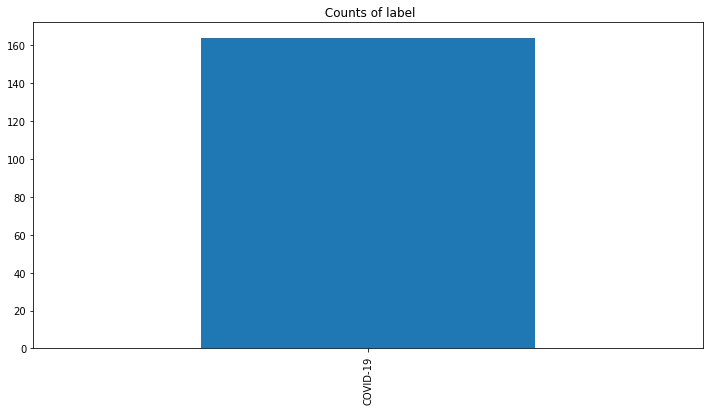

In [0]:
plt.figure(figsize=(12,6))
data1['finding'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

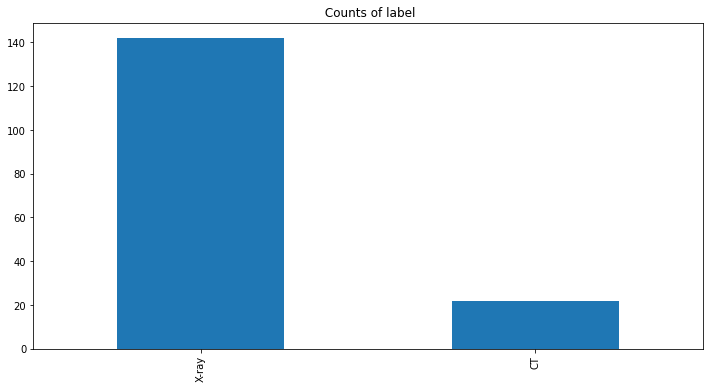

In [0]:
plt.figure(figsize=(12,6))
data1['modality'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

In [0]:
print((data1['modality']=='X-ray').value_counts())
data1= data1[data1.modality == 'X-ray']


True     142
False     22
Name: modality, dtype: int64


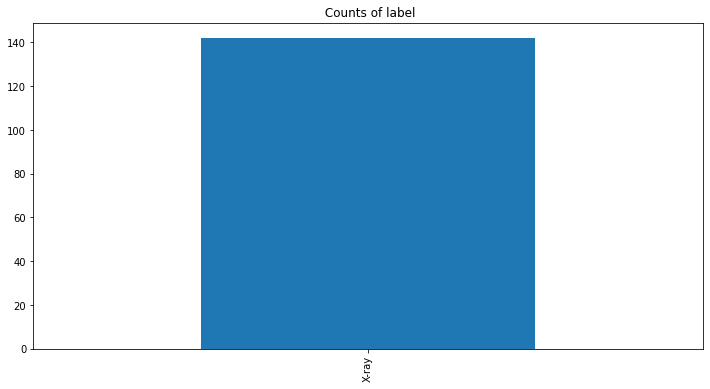

In [0]:
plt.figure(figsize=(12,6))
data1['modality'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

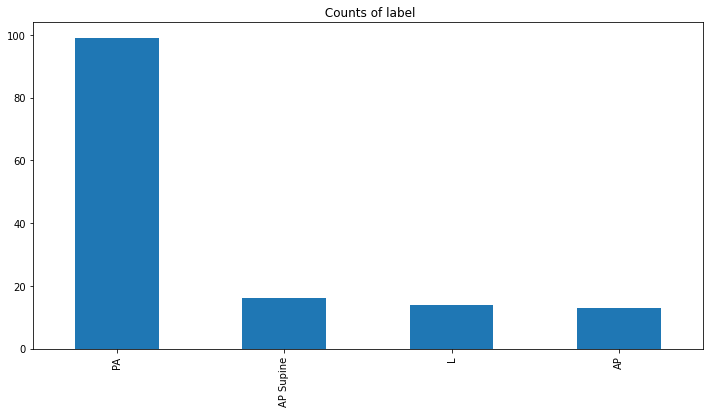

In [0]:
plt.figure(figsize=(12,6))
data1['view'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

In [0]:
print((data1['view']=='PA').value_counts())
data1= data1[data1.view == 'PA']

True     99
False    43
Name: view, dtype: int64


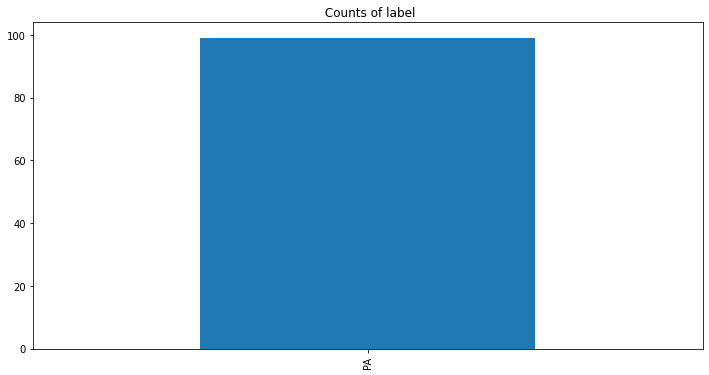

In [0]:

plt.figure(figsize=(12,6))
data1['view'].value_counts().plot(kind = "bar" , title = " Counts of label")
plt.show()

In [0]:
data1.count()

patientid           99
offset              82
sex                 82
age                 74
finding             99
survival            36
temperature          8
pO2 saturation      13
leukocyte count      2
neutrophil count     1
lymphocyte count     1
view                99
modality            99
date                99
location            80
filename            99
doi                 44
 url                99
license             29
clinical notes      98
other notes         57
Unnamed: 21          2
dtype: int64

In [0]:
filename=data1['filename']
import numpy as np

filename.head()
filename=np.asarray(filename)

In [0]:

import glob
import os
import pandas as pd


df = []
for folder in ["/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/**"]:
  #i=i+1
  #print(folder)
 
  for fname in glob.iglob(folder):
    #print(fname)
    #j=j+1

    if os.path.exists(fname):
      #print(fname)
      #label = os.path.basename(fname).split(".")[1]
      df.append(
              {
                  "filename " : fname,
               "label" : 'Normal'
               
              })
      

datafinal=pd.DataFrame(df)
datafinal.count()


filename     111
label        111
dtype: int64

In [0]:
covid =pd.DataFrame(filename,columns=["filename"])

covid['label'] = 'COVID-19'
covid.count()

filename    99
label       99
dtype: int64

In [0]:


import os


i=0
path = "/content/covid-chestxray-dataset/images/"
for f in covid['filename']:
   
   fname = os.path.join(path,f)
   df.append(
              {
                  "filename " : fname,
               "label" : 'COVID-19'
               
              })
   


In [0]:

datafinal=pd.DataFrame(df)
print(datafinal.count())
df[150:200]

filename     210
label        210
dtype: int64


[{'filename ': '/content/covid-chestxray-dataset/images/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg',
  'label': 'COVID-19'},
 {'filename ': '/content/covid-chestxray-dataset/images/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg',
  'label': 'COVID-19'},
 {'filen

In [0]:
for f in df:
  file = list(f.values())
  print(file[0])
  #for filename,label in f.items():
    #print(filename,label)  



/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0001-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0003-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0005-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0006-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0007-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0009-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0010-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0011-0001-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0011-0001-0002.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0011-0001.jpeg
/content/drive/My Drive/Colab Notebooks/keras-covid-19/NORMAL - Copy/IM-0013-0001.jpeg
/content/drive/My Drive/Colab Not

In [0]:
import cv2
data=[]
labels=[]

for f in df:
  file = list(f.values())
  file_path = file[0]
  label = file[1]
  image = cv2.imread(file_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)


 



In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=30)
print(data.shape)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

(210, 224, 224, 3)


#Training by VGG16 Model


In [0]:
# USAGE
# python train.py --dataset dataset

# import the necessary packages
!pip install scipy==1.1.0

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D,AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

     |████████████████████████████████| 31.2MB 122kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
INIT_LR = 1e-3
EPOCHS = 25
BS = 8



In [0]:


trainAug = ImageDataGenerator(
      rescale=1/255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.5,
      brightness_range=[0.7,1.3],
      horizontal_flip=True,
      fill_mode='nearest')



In [0]:
INIT_LR = 1e-3

BS = 8
from keras import optimizers
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)


for layer in baseModel.layers:
	layer.trainable = False


# compile our model
print("[INFO] compiling model...")
opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=25)

[INFO] compiling model...
Epoch 1/25
21/21 [==============================] - 111s 5s/step - loss: 0.7061 - acc: 0.5476 - val_loss: 0.5884 - val_acc: 0.8333
Epoch 2/25
21/21 [==============================] - 109s 5s/step - loss: 0.6489 - acc: 0.6369 - val_loss: 0.5247 - val_acc: 0.8095
Epoch 3/25
21/21 [==============================] - 109s 5s/step - loss: 0.5930 - acc: 0.6845 - val_loss: 0.4825 - val_acc: 0.8333
Epoch 4/25
21/21 [==============================] - 110s 5s/step - loss: 0.5243 - acc: 0.7500 - val_loss: 0.4449 - val_acc: 0.8333
Epoch 5/25
21/21 [==============================] - 109s 5s/step - loss: 0.5712 - acc: 0.7083 - val_loss: 0.4542 - val_acc: 0.8095
Epoch 6/25
21/21 [==============================] - 109s 5s/step - loss: 0.5499 - acc: 0.7143 - val_loss: 0.4131 - val_acc: 0.8571
Epoch 7/25
21/21 [==============================] - 110s 5s/step - loss: 0.4977 - acc: 0.7619 - val_loss: 0.4238 - val_acc: 0.8095
Epoch 8/25
21/21 [==============================] - 110s 

In [0]:
pred = model.predict(testX, batch_size=BS)
pred = np.argmax(pred, axis=1)
print(classification_report(testY.argmax(axis=1), pred,
	target_names=lb.classes_))
cm = confusion_matrix(testY.argmax(axis=1), pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc:" ,acc*100)
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

              precision    recall  f1-score   support

    COVID-19       0.95      0.90      0.92        20
      Normal       0.91      0.95      0.93        22

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

[[18  2]
 [ 1 21]]
acc: 92.85714285714286
sensitivity: 0.9000
specificity: 0.9545


TypeError: ignored

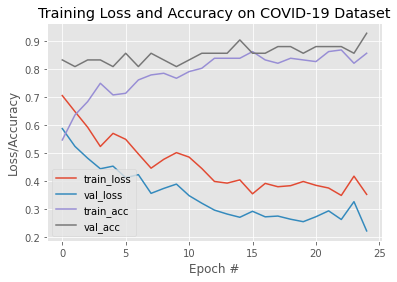

In [0]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

# serialize the model to disk
model.save("usama", save_format="h5")

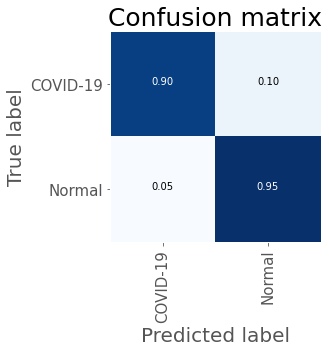

In [0]:
from sklearn.metrics import plot_confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  
    plt.figure(figsize=(5, 5))
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tight_layout()

    plt.show()

cnf_matrix = confusion_matrix(testY.argmax(axis=1), pred)
cnf_matrix = cnf_matrix.astype(float) / cnf_matrix.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cnf_matrix,lb.classes_)

COVID-19 :   18.35709661245346 %
Normal :   81.64290189743042 %
[[0.18357097 0.816429  ]]


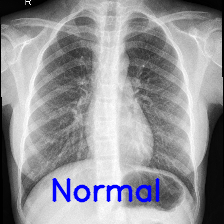

-1

In [0]:
import cv2
import numpy as np

image = cv2.imread(r'/content/drive/My Drive/Colab Notebooks/keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
data = np.array(image) / 255.0
data =data.reshape(1,224,224,3)
results = model.predict(data)
label = lb.classes_
print(label[0],":  ",results[0][0]*100,"%")
print(label[1],":  ",results[0][1]*100,"%")
print(results)
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
#_img = load_img("duck.jpg",target_size=(224,224))
_img = load_img("/content/drive/My Drive/Colab Notebooks/keras-covid-19/dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg",target_size=(224,224))
#plt.imshow(_img)
#plt.show()
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg')
result=label[1]
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (50, 200) 
fontScale = 1
color = (255, 0, 0) 
thickness = 2
from google.colab.patches import cv2_imshow
image = cv2.putText(image, result, org, font,  
                   fontScale, color, thickness, cv2.LINE_AA)
cv2_imshow( image) 
cv2.waitKey(0) 

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
from vis.utils import utils
from keras import activations

class_idxs_sorted = np.argsort(results.flatten())[::-1]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_4')
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [0]:
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "block5_conv3") 
class_idx  =class_idxs_sorted
seed_input = image
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

NameError: ignored

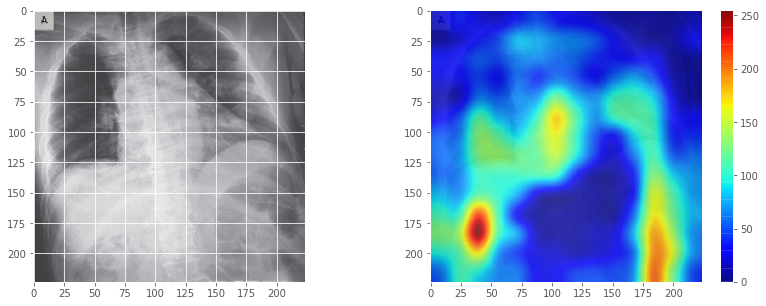

In [0]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    plt.grid(b=None)
   
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabel[class_idx],
                      y_pred[0,class_idx]))
plot_map(grad_top1)

#Training by Xception Model

In [0]:
import datetime
import os, sys, shutil
import numpy as np
from numpy import loadtxt
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers, applications,activations
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input,Flatten
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import TensorBoard
import time



In [0]:

from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
INIT_LR = 1e-3
EPOCHS = 25
BS = 8


trainAug = ImageDataGenerator(
      rescale=1/255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.5,
      brightness_range=[0.7,1.3],
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8



baseModel = applications.Xception(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False


opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)  

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
83689472/83683744 [==============================] - 1s 0us/step
[INFO] training head...
Epoch 1/25
21/21 [==============================] - 74s 4s/step - loss: 0.6369 - acc: 0.6250 - val_loss: 0.3424 - val_acc: 0.9762
Epoch 2/25
21/21 [==============================] - 69s 3s/step - loss: 0.4740 - acc: 0.7679 - val_loss: 0.6882 - val_acc: 0.6905
Epoch 3/25
21/21 [==============================] - 68s 3s/step - loss: 0.5052 - acc: 0.7738 - val_loss: 0.4683 - val_acc: 0.8095
Epoch 4/25
21/21 [==============================] - 67s 3s/step - loss: 0.3892 - acc: 0.8452 - val_loss: 0.1450 - val_acc: 0.9524
Epoch 5/25
21/21 [==============================] - 68s 3s/step - loss: 0.4045 - acc: 0.8393 - val_loss: 0.2041 - val_acc: 0.9048
Epoch 6/25
21/21 [==============================] - 68s 3s/step - loss: 0.3492 - acc: 0.8452 - val_loss: 0.2887 - val_acc: 0.9048
Epoch 7/25
21

In [0]:
pred = model.predict(testX, batch_size=BS)
pred = np.argmax(pred, axis=1)
print(classification_report(testY.argmax(axis=1), pred,
	target_names=lb.classes_))
cm = confusion_matrix(testY.argmax(axis=1), pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc:" ,acc*100)
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

              precision    recall  f1-score   support

    COVID-19       1.00      0.90      0.95        20
      Normal       0.92      1.00      0.96        22

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

[[18  2]
 [ 0 22]]
acc: 95.23809523809523
sensitivity: 0.9000
specificity: 1.0000


[INFO] saving COVID-19 detector model...


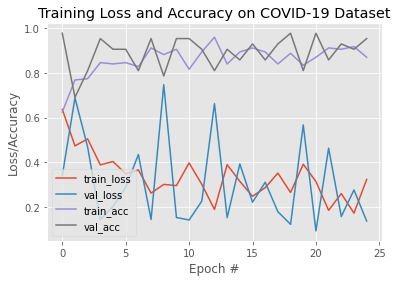

In [0]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("usama", save_format="h5")

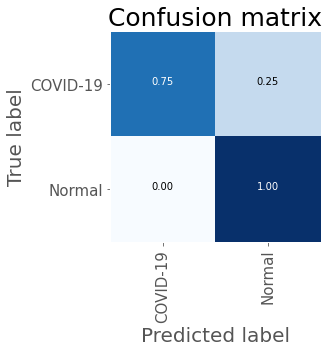

In [0]:
 from sklearn.metrics import plot_confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  
    plt.figure(figsize=(5, 5))
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tight_layout()

    plt.show()

cnf_matrix = confusion_matrix(testY.argmax(axis=1), pred)
cnf_matrix = cnf_matrix.astype(float) / cnf_matrix.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cnf_matrix,lb.classes_)

#Training by Resnet50 model




In [0]:
import datetime
import os, sys, shutil
import numpy as np
from numpy import loadtxt
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers, applications,activations
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input,Flatten
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import TensorBoard
import time



In [0]:

from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
INIT_LR = 1e-3
EPOCHS = 25
BS = 8






trainAug = ImageDataGenerator(
      rescale=1/255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.5,
      brightness_range=[0.7,1.3],
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:

baseModel = applications.VGG19(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False


opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)  

In [0]:
pred = model.predict(testX, batch_size=BS)
pred = np.argmax(pred, axis=1)
print(classification_report(testY.argmax(axis=1), pred,
	target_names=lb.classes_))
cm = confusion_matrix(testY.argmax(axis=1), pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc:" ,acc*100)
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

In [0]:
from sklearn.metrics import plot_confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  
    plt.figure(figsize=(5, 5))
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tight_layout()

    plt.show()

cnf_matrix = confusion_matrix(testY.argmax(axis=1), pred)
cnf_matrix = cnf_matrix.astype(float) / cnf_matrix.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cnf_matrix,lb.classes_)

#Training by my Model

In [0]:
import keras
from keras.layers import Conv2D,Convolution2D,Flatten,Dense,Dropout,MaxPooling2D,GlobalAveragePooling2D
from keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))
model.summary()

In [0]:
from keras import optimizers
opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=100)  

In [0]:
!pip uninstall tensorflow
!pip install tensorflow == 1.14

ERROR: Invalid requirement: '=='
